In [1]:
#import numpy as np
#import matplotlib.pyplot as plt
#import cProfile
#import mahotas
#import itk
#import skimage.feature as ft

#own libraries inside lib/ 
from lib.evaluator import *
from lib.features import *
from lib.shapes import *
#from lib.kneedata import *
from lib.plot import *
from lib.MLMethod import *
from lib.NaiveFeatures import *
from lib.features import *
import matplotlib.pyplot as plt
import pickle
from lib.vggModel import *
from lib.mrnetdata import *

Using TensorFlow backend.


In [2]:
d=KneeData()
d.loadData(from_original_files=True,pickled_db_path="pickled/erik_train.pck",path='/home/dawit/Datalogi/BachelorProjekt/data/erik/train_data/')
d2=KneeData()
d2.loadData(from_original_files=True,pickled_db_path="pickled/erik_train.pck",path='/home/dawit/Datalogi/BachelorProjekt/data/erik/test_data/')
#scans = d.getScansAtSlice(three_slices=True)

In [2]:

simple = SimpleShapeData()

In [8]:
simple.scans = simple.scans_train
simple.labels = simple.labels_train

In [3]:
#with open("pickled/mrnet_"+"abnormal"+"_test.pck",'rb') as fp:   
#    mrnet = pickle.load(fp)                         
h = LBPFeatures(1,1)
h.fit_parameters(8,simple.scans,simple.labels,"shape","triangle",radius_max=15,multiple_max=10)

(1, 1) 0.18359375
(2, 1) 1.0
[((2, 1), 1.0), ((1, 1), 0.18359375)]
finished LBP fitting 1 2 1.0
Elapsed time: 0.19718313217163086


In [9]:
#h.selected_features = [1]
#simple.scans = simple.scans_train
#simple.labels= simple.labels_train
e = Evaluator(data_obj=simple,method_obj=h,load_as_slice=False,three_slices=False)
#simple = SimpleShapeData()
#print(simple.scans.shape)

initialization finished


In [10]:
e.calcAuc(8,"shape","triangle")

1.0

In [14]:
e.probabilities

array([0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.125,
       0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
       0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [44]:
indices,dist = e.query(0,9)

In [45]:
#indices,dist= e.query(8,9)
p = -1
#n = 0
for i in indices:
    
    if (e.labels[i]["shape"] == "triangle") == (e.labels[indices[0]]["shape"]== "triangle"):
   #     print("hit")       
        p += 1
#    else:
#        n += 1
    print(e.labels[i])
print(p/len(indices[1:]))
#e.calcAuc(12,"value",True)
#print(len(e.labels))

{'shape': 'triangle', 'offset': 'top-left', 'noise': 0.05}
{'shape': 'triangle', 'offset': 'bottom-left', 'noise': 0.05}
{'shape': 'triangle', 'offset': 'top-right', 'noise': 0.05}
{'shape': 'triangle', 'offset': 'bottom-right', 'noise': 0.05}
{'shape': 'square', 'offset': 'top-left', 'noise': 0.05}
{'shape': 'square', 'offset': 'bottom-left', 'noise': 0.05}
{'shape': 'square', 'offset': 'top-right', 'noise': 0.05}
{'shape': 'square', 'offset': 'bottom-right', 'noise': 0.05}
{'shape': 'circle', 'offset': 'top-left', 'noise': 0.05}
0.375


In [27]:
label_value = "triangle"
e.countClassificationRatio(indices[1:],"shape",e.labels[0]["shape"]==label_value,label_value)
#.calcClassificationProbabilities(25,"value",True)
#h.featureSelector(5,12,simple.scans,simple.labels,"shape","triangle")
#self.haralicks.featureSelector(5,k,slices,train_data.labels,label_name,label_value)       #5

0.125

In [25]:
#e = Evaluator(data_obj=simple,method_obj=h,load_as_slice=False,three_slices=False)
#indices,dist=e.query(1,12)
e.calcAuc(12,"shape","triangle")
#len(mrnet.scans)
#len(e.scans)

0.0

In [32]:
indices,dist=e.query(2,13)

In [33]:
for i in indices:
    print(e.labels[i])

{'shape': 'triangle', 'offset': 'top-left', 'noise': 0.05}
{'shape': 'triangle', 'offset': 'bottom-left', 'noise': 0.05}
{'shape': 'triangle', 'offset': 'top-right', 'noise': 0.05}
{'shape': 'triangle', 'offset': 'bottom-right', 'noise': 0.05}
{'shape': 'circle', 'offset': 'top-left', 'noise': 0.05}
{'shape': 'circle', 'offset': 'bottom-left', 'noise': 0.05}
{'shape': 'circle', 'offset': 'top-right', 'noise': 0.05}
{'shape': 'circle', 'offset': 'bottom-right', 'noise': 0.05}
{'shape': 'square', 'offset': 'top-left', 'noise': 0.05}
{'shape': 'square', 'offset': 'bottom-left', 'noise': 0.05}
{'shape': 'square', 'offset': 'top-right', 'noise': 0.05}
{'shape': 'square', 'offset': 'bottom-right', 'noise': 0.05}
{'shape': 'triangle', 'offset': 'bottom-right', 'noise': 0.15}


In [16]:
#v = VGG16(include_top=True,weights="imagenet")
#v.summary()


In [17]:
#from keras.applications.vgg16 import VGG16
#model = VGGModel()#LBP3DFeatures([[1,1],[1,1],[1,1]])#VGGModel()#VGG16(include_top=False,weights="imagenet",)
#model = Haralicks(compute_dog=False)
#img_path = 'elephant.jpg'
#img = image.load_img(img_path, target_size=(224, 224))
#x = image.img_to_array(img)
#x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
#model.model.summary()
    
#model.featureSelector(5,8,scans,d.labels,"ishealthy",True)
#histo = model.fit(mrnet_train.getScansAtSlice(three_slices=True),mrnet_train.labels,"value",True)
#histo = model.fit(d.getScansAtSlice(three_slices=True),d.labels,"ishealthy",True)
#histo = model.fit(simple.scans_train,simple.labels_train,"shape","triangle")
#model.model.summary()

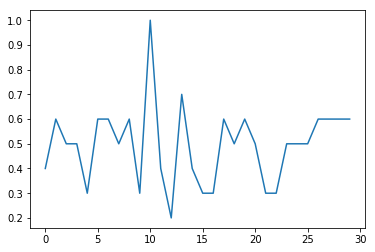

[0.4, 0.6, 0.5, 0.5, 0.3, 0.6, 0.6, 0.5, 0.6, 0.3, 1.0, 0.4, 0.2, 0.7, 0.4, 0.3, 0.3, 0.6, 0.5, 0.6, 0.5, 0.3, 0.3, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6]


In [11]:
import matplotlib.pyplot as plt
plt.plot(histo.accuracy)
plt.show()
print(histo.accuracy)

In [7]:
e = Evaluator(data_obj=d,method_obj=model,load_as_slice=True,three_slices=True)

NameError: name 'd' is not defined

In [2]:
print(e.calcAuc(8,"ishealthy",True))
print(e.probabilities)
#print(e.labels)
for index,i in enumerate(e.labels):
    print(index,i)

#m = VGGModel()
#m.model.summary()
#n = VGGModel()
#n.model.summary()

NameError: name 'e' is not defined

In [22]:
#def countClassificationRatio(self,label_indices,label_name,is_positive,label_value):
e.countClassificationRatio(indices[1:],"ishealthy",False,True)

0.25

In [7]:
a = model.extractFeatures(simple.scans[0])
b = model.extractFeatures(simple.scans[8])
model.distance(a,b)

21.628978729248047

In [13]:
indices,dist = e.query(10,9)
print(indices)
print(dist)
for ind,i in enumerate(indices):
    print(dist[ind])
    print(e.labels[i])
#model.model.summary()
#model.model.get_layer('dense_1')

[10, 40, 50, 7, 13, 55, 15, 53, 4]
[0.0, 3.642783933665531e-05, 5.569864555560666e-05, 6.464931999770711e-05, 6.757232227558351e-05, 7.787558610436885e-05, 7.93163629063693e-05, 8.095402462127621e-05, 9.051217112125351e-05]
0.0
{'ishealthy': False, 'isright': True, 'age': 70}
3.642783933665531e-05
{'ishealthy': True, 'isright': False, 'age': 43}
5.569864555560666e-05
{'ishealthy': False, 'isright': True, 'age': 74}
6.464931999770711e-05
{'ishealthy': True, 'isright': True, 'age': 24}
6.757232227558351e-05
{'ishealthy': False, 'isright': True, 'age': 69}
7.787558610436885e-05
{'ishealthy': True, 'isright': True, 'age': 43}
7.93163629063693e-05
{'ishealthy': True, 'isright': False, 'age': 36}
8.095402462127621e-05
{'ishealthy': False, 'isright': True, 'age': 71}
9.051217112125351e-05
{'ishealthy': True, 'isright': False, 'age': 57}


In [5]:
d=KneeData()
d.loadData(from_original_files=True,pickled_db_path="pickled/erik_train.pck",path='/home/dawit/Datalogi/BachelorProjekt/data/erik/train_data/')
scans = d.getScansAtSlice(three_slices=True)

In [7]:
sum_v = 0
a = model.extractFeatures(simple.scans[0])
for i in range(1,20):
    b = model.extractFeatures(simple.scans[i])
    temp = model.distance(a,b)
    sum_v+= temp
    if temp!=0:
        print(i,temp)
    a = b
b = model.extractFeatures(simple.scans[20])
print(sum_v)
#print(a.shape)
#b = a[:]
#b[0,0] = b[0,0] +1100000
#print(model.distance(a[0],b[0]))
#print(a)
#print(b)

0.0


In [8]:
a = model.extractFeatures(simple.scans[0])
b = model.extractFeatures(simple.scans[1])
#print(model.distance(a,b))
print(a)
print(b)


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [8]:
#haralicks, lbp, haralicks3d, lbp3d
#[[1, 6], (1, 1)]
#[[3], (3, 9), [3], (3, 9, 1, 1, 9, 45)]
#[[3], (9, 72), [5, 8], (9, 72, 4, 32, 9, 63)]
#[[9], (8, 72), [11, 4], (8, 72, 4, 28, 6, 48)]
#[[3], (1, 4), [5, 8, 2], (1, 4, 6, 30, 11, 99)]
#["toy_data","erik","mrnet_abnormal","mrnet_meniscus","mrnet_acl"]
base = "pickled/save_results/fitted_methods_"
end = "_train.pck"
datasets = ["toy_data","erik","mrnet_abnormal","mrnet_meniscus","mrnet_acl"]
datasets = [d+end if d != "toy_data" else d+".pck" for d in datasets]
for d in datasets:
    with open(base+d,'rb') as fp:   
        fitted =pickle.load(fp)         
        print(fitted)

[[1, 6], (1, 1)]
[[3], (3, 9), [3], (3, 9, 1, 1, 9, 45)]
[[3], (9, 72), [5, 8], (9, 72, 4, 32, 9, 63)]
[[9], (8, 72), [11, 4], (8, 72, 4, 28, 6, 48)]
[[3], (1, 4), [5, 8, 2], (1, 4, 6, 30, 11, 99)]


In [2]:
a = {"a":1}
b = {"b":2}
dict(a,**b)

{'a': 1, 'b': 2}

In [2]:
d=KneeData()
d.loadData(from_original_files=True,pickled_db_path="pickled/erik_train.pck",path='/home/dawit/Datalogi/BachelorProjekt/data/erik/train_data/')
haralicks = Haralicks(compute_dog=False)
haralicks.featureSelector(5,15,d.getScansAtSlice(),d.labels,"ishealthy",True)       #5

[(8, 0.74822695035461), (4, 0.7168186423505573), (2, 0.7077001013171227), (11, 0.7041540020263426), (1, 0.6935157041540021), (10, 0.6762917933130699), (12, 0.6732522796352584), (5, 0.5374873353596759), (9, 0.5288753799392096), (3, 0.5212765957446809), (6, 0.5136778115501519), (7, 0.5040526849037487), (0, 0.49341438703140833)]
[(10, 0.8338399189463019), (2, 0.7619047619047619), (11, 0.7522796352583587), (9, 0.74822695035461), (12, 0.74822695035461), (0, 0.7431610942249239), (4, 0.7416413373860182), (7, 0.7147922998986829), (1, 0.6935157041540021), (5, 0.5952380952380952), (3, 0.5212765957446809), (6, 0.5136778115501519)]
[(0, 0.8338399189463019), (4, 0.8338399189463019), (9, 0.8338399189463019), (12, 0.8338399189463019), (2, 0.8297872340425532), (11, 0.8171225937183384), (7, 0.7781155015197568), (1, 0.6935157041540021), (5, 0.6058763931104357), (3, 0.5212765957446809), (6, 0.5136778115501519)]
[(4, 0.8338399189463019), (9, 0.8338399189463019), (12, 0.8338399189463019), (2, 0.82978723404

In [5]:
#full_data = KneeData()
#full_data.loadData(from_original_files=True,pickled_db_path="scans_and_labels_full.pck",path='/home/dawit/Datalogi/BachelorProjekt/data/full_data/')

train_data = KneeData()
train_data.loadData(from_original_files=True,pickled_db_path="scans_and_labels_train.pck",path='/home/dawit/Datalogi/BachelorProjekt/data/erik/train_data/')
#train_data.prepareTrainingData()

#test_data = KneeData()
#test_data.loadData(from_original_files=True,pickled_db_path="scans_and_labels_test.pck",path='/home/dawit/Datalogi/BachelorProjekt/data/test_data/')

In [6]:
count_t = 0
count_f = 0
depth = [i.shape[2] for i in train_data.scans]
print(min(depth)) #104
print(max(depth)) #114
#for i in train_data.scans:
#    print
#    val = train_data.name_label[i]
#    if val:
#        count_t += 1
#    else:
#        count_f += 1
#    print(i,val)
#print(count_t,count_f)
#lbp = LBPFeatures(8,30)
#lbp3d= LBP3DFeatures([(8,30),(8,30),(8,30)])

104
122


In [7]:
#lbp3d.fit_parameters(5,train_data.scans,train_data.labels,"ishealthy",True,2,2)

In [8]:
#test_data.scans[0].shape

In [9]:
#lbp.fit_parameters(5,train_data.getScansAtSlice(40)[:5],train_data.labels,"ishealthy",True)
#lbp3d.fit_parameters(5,train_data.scans,train_data.labels,"ishealthy",True,10,10)
#lbp3d.extractFeatures(train_data.scans[0],None,None)

In [10]:
e_lbp = Evaluator(data_obj=train_data,method_obj=lbp,load_as_slice=True)
#e_lbp3d = Evaluator(data_obj=train_data,method_obj=lbp3d,load_as_slice=False)

initialization finished


In [11]:
print(e_lbp.MAP(train_data.count,5,["ishealthy"]))
#print(e_lbp3d.MAP(train_data.count,5,["ishealthy"]))
#print(e_lbp.calcAuc(5,"ishealthy",True))
#print(e_lbp3d.calcAuc(5,"ishealthy",True))

Elapsed time: 0.4541006088256836
(0.6857352941176472, 0.3026111018294003)


In [15]:
#haralicks_method = Haralicks(compute_dog=False)
mid = round(train_data.scans[0].shape[2]/2)
haralicks_method_selected = Haralicks(compute_dog=False)
haralicks_method_selected.featureSelector(5,5,train_data.getScansAtSlice(mid),train_data.labels,"ishealthy",True)

haralicks3d_method_selected = Haralicks(compute_dog=False)
haralicks3d_method_selected.featureSelector(5,5,train_data.scans,train_data.labels,"ishealthy",True)

#lbp_method = LBPFeatures(8,30)

lbp_method_selected = LBPFeatures()
lbp_method_selected.fit_parameters(5,train_data.getScansAtSlice(mid),train_data.labels,"ishealthy",True)

#lbp3d_method = LBP3DFeatures([(8,30),(8,30),(8,30)])

lbp3d_method_selected = LBP3DFeatures([(8,30),(8,30),(8,30)])
lbp3d_method_selected.fit_parameters(5,train_data.scans,train_data.labels,"ishealthy",True)

#ml_method = ConvolutionMethod(train_data,load_prev_model=False,input_size=train_data.count)

models = [haralicks_method_selected,haralicks3d_method_selected,lbp_method_selected,lbp3d_method_selected]#,ml_method]
with open("fitted_models",'wb') as fp:   
    pickle.dump(models,fp)      


0
1
2
3
4
5
6
7
8
9
10
11
12
[(0, 0.5), (1, 0.5), (2, 0.5), (3, 0.5), (4, 0.5), (5, 0.5), (6, 0.5), (7, 0.5), (8, 0.5), (9, 0.5), (10, 0.5), (11, 0.5), (12, 0.5)]
0
1
2
3
4
5
6
7
8
9
10
11
12
[(0, 0.5), (1, 0.5), (2, 0.5), (3, 0.5), (4, 0.5), (5, 0.5), (6, 0.5), (7, 0.5), (8, 0.5), (9, 0.5), (10, 0.5), (11, 0.5), (12, 0.5)]
1
1 1 0.5
Elapsed time: 0.008237838745117188
1
1 1 0.5
Elapsed time: 0.00968480110168457
1
1 1 0.5
Elapsed time: 0.0054852962493896484
1
1 1 0.5
Elapsed time: 0.005563020706176758


In [16]:
with open("fitted_models",'rb') as fp:
    haralicks_method_selected,haralicks3d_method_selected,lbp_method_selected,lbp3d_method_selected = pickle.load(fp)

In [26]:
ml_method = ConvolutionMethod(train_data,load_prev_model=False,input_size=2)

Time usage: 0:00:00


In [27]:
#e_haralicks = Evaluator(data_obj=test_data,method_obj=haralicks_method,load_as_slice=True)
e_haralicks_selected = Evaluator(data_obj=test_data,method_obj=haralicks_method_selected,load_as_slice=True)
e_haralicks3d_selected = Evaluator(data_obj=test_data,method_obj=haralicks3d_method_selected,load_as_slice=False)
#e_lbp       = Evaluator(data_obj=test_data,method_obj=lbp_method,load_as_slice=True)
e_lbp_selected       = Evaluator(data_obj=test_data,method_obj=lbp_method_selected,load_as_slice=True)
#e_lbp3d       = Evaluator(data_obj=test_data,method_obj=lbp3d_method,load_as_slice=True)
e_lbp3d_selected       = Evaluator(data_obj=test_data,method_obj=lbp3d_method_selected,load_as_slice=False)
e_ML_shape  = Evaluator(data_obj=test_data,method_obj=ml_method,load_as_slice=True)

initialization finished
initialization finished
initialization finished
initialization finished
initialization finished


In [28]:
print(haralicks_method_selected.selected_features)
print(haralicks3d_method_selected.selected_features)
print(lbp_selected.radius,lbp_selected.n_points)
print(lbp3d_selected.lbp_xy.radius,lbp3d_selected.lbp_xy.n_points)
print(lbp3d_selected.lbp_xz.radius,lbp3d_selected.lbp_xz.n_points)
print(lbp3d_selected.lbp_yz.radius,lbp3d_selected.lbp_yz.n_points)

[0]
[0]


NameError: name 'lbp_selected' is not defined

In [ ]:
#print(e_haralicks.calcAuc(5,"ishealthy",True))
print(e_haralicks_selected.calcAuc(5,"shape","triangle"))
print(e_haralicks3d_selected.calcAuc(5,"shape","triangle"))
#print(e_lbp.calcAuc(5,"shape","triangle"))
print(e_lbp_selected.calcAuc(5,"shape","triangle"))
print(e_lbp3d_selected.calcAuc(5,"shape","triangle"))
#print(e_ML_shape.calcAuc(5,"shape","triangle"))
#print(e_haralicks.MAP(test_data.count,5,["ishealthy"]))
#print(e_lbp.MAP(test_data.count,5,["ishealthy"]))
print(e_ml_shape.calcAuc(5,"shape","triangle"))
print("_______MAP___________")
print(e_haralicks_selected.MAP(test_data.count,5,["ishealthy"]))
print(e_haralicks3d_selected.MAP(test_data.count,5,["ishealthy"]))
print(e_lbp_selected.MAP(test_data.count,5,["ishealthy"]))
print(e_lbp3d_selected.MAP(test_data.count,5,["ishealthy"]))
print(e_ML_shape.MAP(test_data.count,5,["ishealthy"]))

In [ ]:
e_haralicks_selected.precisionRecall(5,"ishealthy",True)
e_haralicks3d_selected.precisionRecall(5,"ishealthy",True)
e_lbp_selected.precisionRecall(5,"ishealthy",True)
e_lbp3d_selected.precisionRecall(5,"ishealthy",True)
e_ML_shape.precisionRecall(5,"ishealthy",True)